## Exploratory Data Analysis & Feature Engineering on Zomato Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df.shape

(9551, 21)

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.describe(include='all')

Restaurant ID  Restaurant Name  Country Code       City  \
count    9.551000e+03             9551   9551.000000       9551   
unique            NaN             7446           NaN        141   
top               NaN  Cafe Coffee Day           NaN  New Delhi   
freq              NaN               83           NaN       5473   
mean     9.051128e+06              NaN     18.365616        NaN   
std      8.791521e+06              NaN     56.750546        NaN   
min      5.300000e+01              NaN      1.000000        NaN   
25%      3.019625e+05              NaN      1.000000        NaN   
50%      6.004089e+06              NaN      1.000000        NaN   
75%      1.835229e+07              NaN      1.000000        NaN   
max      1.850065e+07              NaN    216.000000        NaN   

                           Address         Locality  \
count                         9551             9551   
unique                        8918             1208   
top     Dilli Haat, INA, New Delhi  Connaught Place   
freq                            11              122   
mean                           NaN              NaN   
std                            NaN              NaN   
min                            NaN              NaN   
25%                            NaN              NaN   
50%                            NaN              NaN   
75%                            NaN              NaN   
max                            NaN              NaN   

                  Locality Verbose    Longitude     Latitude      Cuisines  \
count                         9551  9551.000000  9551.000000          9542   
unique                        1265          NaN          NaN          1825   
top     Connaught Place, New Delhi          NaN          NaN  North Indian   
freq                           122          NaN          NaN           936   
mean                           NaN    64.126574    25.854381           NaN   
std                            NaN    41.467058    11.007935           NaN   
min                            NaN  -157.948486   -41.330428           NaN   
25%                            NaN    77.081343    28.478713           NaN   
50%                            NaN    77.191964    28.570469           NaN   
75%                            NaN    77.282006    28.642758           NaN   
max                            NaN   174.832089    55.976980           NaN   

        ...            Currency Has Table booking Has Online delivery  \
count   ...                9551              9551                9551   
unique  ...                  12                 2                   2   
top     ...  Indian Rupees(Rs.)                No                  No   
freq    ...                8652              8393                7100   
mean    ...                 NaN               NaN                 NaN   
std     ...                 NaN               NaN                 NaN   
min     ...                 NaN               NaN                 NaN   
25%     ...                 NaN               NaN                 NaN   
50%     ...                 NaN               NaN                 NaN   
75%     ...                 NaN               NaN                 NaN   
max     ...                 NaN               NaN                 NaN   

       Is delivering now Switch to order menu  Price range  Aggregate rating  \
count               9551                 9551  9551.000000       9551.000000   
unique                 2                    1          NaN               NaN   
top                   No                   No          NaN               NaN   
freq                9517                 9551          NaN               NaN   
mean                 NaN                  NaN     1.804837          2.666370   
std                  NaN                  NaN     0.905609          1.516378   
min                  NaN                  NaN     1.000000          0.000000   
25%                  NaN                  NaN     1.000000          2.500000   
50%     

In [8]:
## missing values
df.isnull().sum() 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Inference : only in cuisines there are 9 missing values

In [13]:
# using code to extract which columns(feature) has missing value
[features for features in df.columns if df[features].isnull().sum()>1]

['Cuisines']

<AxesSubplot: >

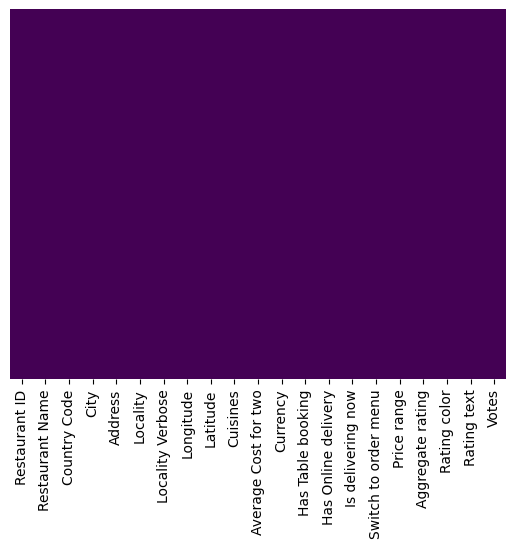

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [23]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [26]:
## we can combine country code from zomato and country xlsx
final_df=pd.merge(df,df_country,on='Country Code',how='left')
final_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [28]:
## feel the data types
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [57]:
country_names = final_df['Country'].value_counts().index
country_value = final_df['Country'].value_counts().values
print(country_names,"\n",country_value)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object') 
 [8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x2a8940d8490>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

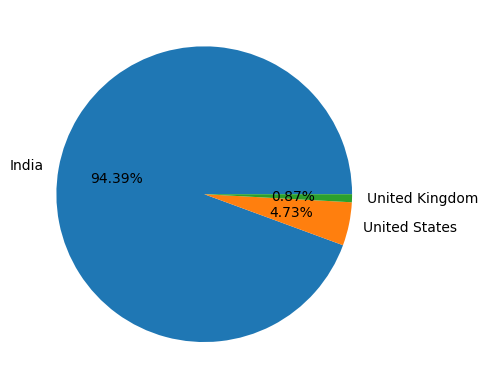

In [61]:
# pie chart with top 3 country and values
plt.pie(country_value[:3],labels=country_names[:3],autopct='%1.2f%%')

Inference : India has most users of Zomato 94.39% - followed by United States at 47.3% and then followed by Uited Kingdom at 0.87%

In [63]:
## Let's check how many relationships we can explore
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [64]:
final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size()


Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

notice how the color varies for the ratings

In [71]:
ratings=final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

Inference:
Excellent = 4.5 to 4.9 
Very Good = 4.0 to 4.4
Good = 3.5 to 3.9
Average = 3.0 to 3.4
Poor = 2.5 to 2.9
Not rated = 0

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

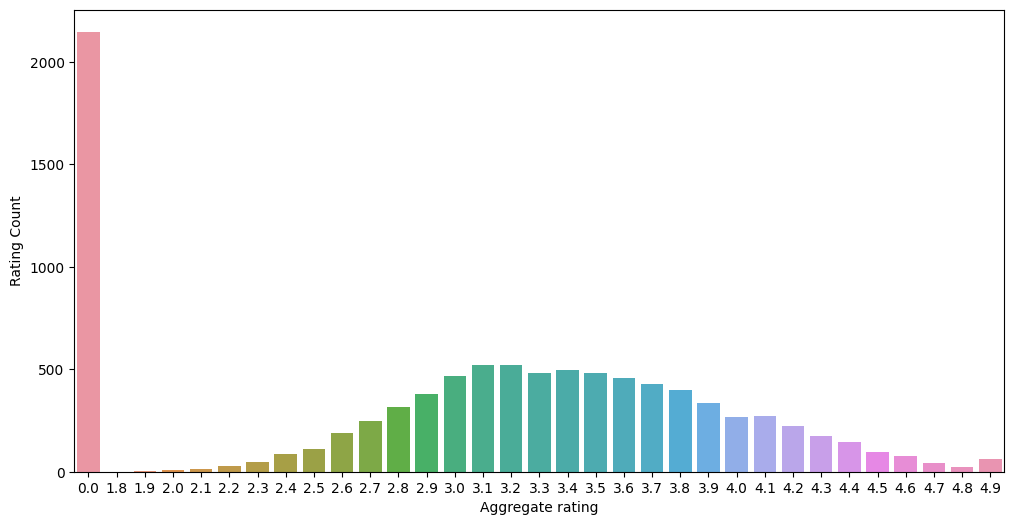

In [86]:

plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<AxesSubplot: xlabel='Aggregate rating', ylabel='Rating Count'>

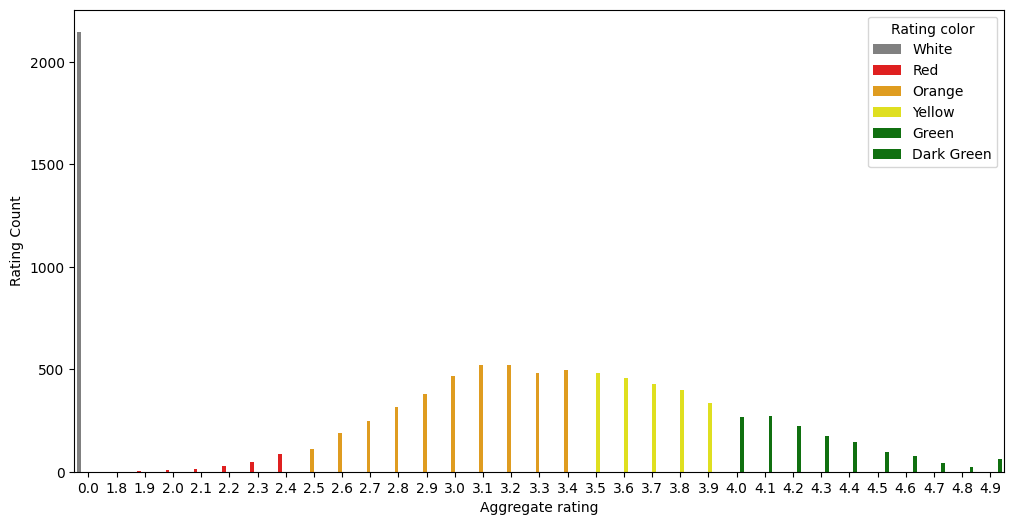

In [90]:
#let's visualize with the same colors

plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings,hue='Rating color',palette="grey red orange yellow green green".split())

Inference:
1. No ratings count is very high
2. max count of ratings are between 2.5 to 3.4
                                                                                     

<AxesSubplot: xlabel='Rating color', ylabel='count'>

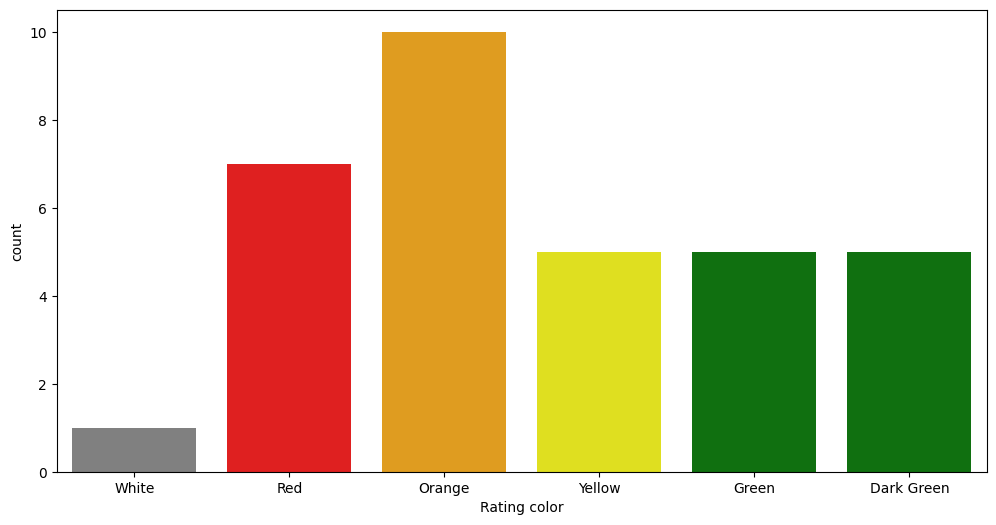

In [91]:
## Count plot

sns.countplot(x="Rating color",data=ratings,palette="grey red orange yellow green green".split())
## y-axis is the frequencey of that particular rating color in the df

In [97]:
## country names that have given 0
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

In [100]:
# aliter
final_df.groupby(['Aggregate rating','Country']).size().head(5)

Aggregate rating  Country       
0.0               Brazil               5
                  India             2139
                  United Kingdom       1
                  United States        3
1.8               India                1
dtype: int64

Inference : Indian customers are the ones who didnt give the most ratings

In [102]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434

In [103]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [115]:
## Countries that have the online delivery and their count
final_df[final_df['Has Online delivery']=='Yes'].groupby(['Country']).size().reset_index()

Country     0
0        Australia    24
1           Brazil    60
2           Canada     4
3            India  8652
4        Indonesia    21
5      New Zealand    40
6      Phillipines    22
7            Qatar    20
8        Singapore    20
9     South Africa    60
10       Sri Lanka    20
11          Turkey    34
12             UAE    60
13  United Kingdom    80
14   United States   434

In [16]:
## Let's use Pandas Profiling to generate a quick report
from pandas_profiling import ProfileReport
profile=ProfileReport(df,explorative=True)
profile.to_file('output.html')

C:\Users\bikky\AppData\Local\Temp\ipykernel_9104\1727647418.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
## render the output html in notebook cell
import IPython
IPython.display.HTML(filename='output.html')

In [ ]:
import dtale
dtale.show(df)

C:\Users\bikky\AppData\Roaming\Python\Python39\site-packages\dtale\views.py:755: FutureWarning:

['Cuisines'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



2023-05-21 18:12:38,942 - INFO     - Executing shutdown due to inactivity...
2023-05-21 18:12:47,150 - INFO     - Executing shutdown...
2023-05-21 18:12:47,153 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\bikky\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\bikky\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\bikky\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\bikky\AppData\Roaming\Python\Python39\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\bikky\AppData\Roaming\Python\Python39\site-packages\dtale\app.py", line 435, in shutdown
  